In [608]:
% matplotlib inline
import os
import sys
import importlib
import pickle
import pprint

import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import scipy.stats as stats

import redfin
import homepricemodels

importlib.reload(redfin)
importlib.reload(homepricemodels)



pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error, r2_score



seaborn.set_context(context='talk')




In [50]:
!pwd
!ls

/Users/timcodes/ds/metis/metisgh/02_Luther/Luther
LICENSE
README.md
__pycache__
explore_luther.ipynb
geckodriver.log
homepricemodels.py
pickles
rappold_tim_challenge_05_linear_splitting.ipynb
redfin.py
redfin_2018-04-18-08-51-54.csv


In [594]:
sample_stats = [{'APN': '048626200702',
                 'Baths': '1',
                 'Beds': '2',
                 'County': 'Alameda County',
                 'Finished Sq. Ft.': '1,700',
                 'Last Sold': 'May 10, 2017',
                 'Lot Size': '0.7 Acres',
                 'Sales Price': '$800,000',
                 'Stories': '1',
                 'Style': 'Single Family Residential',
                 'Total Sq. Ft.': '1,700',
                 'Unfinished Sq. Ft.': '—',
                 'Year Built': '1927',
                 'Year Renovated': '1960',
                 'Zip Code': '94605',
                 'rURL': '/n/a'},

                {'APN': '048626200702',
                 'Baths': '1',
                 'Beds': '3',
                 'County': 'Alameda County',
                 'Finished Sq. Ft.': '1,900',
                 'Last Sold': 'May 10, 2017',
                 'Lot Size': '0.7 Acres',
                 'Sales Price': '$800,000',
                 'Stories': '1',
                 'Style': 'Single Family Residential',
                 'Total Sq. Ft.': '1,900',
                 'Unfinished Sq. Ft.': '—',
                 'Year Built': '1927',
                 'Year Renovated': '1960',
                 'Zip Code': '94605',
                 'rURL': '/n/a'},
    
                {'APN': '048626200702',
                 'Baths': '2',
                 'Beds': '3',
                 'County': 'Alameda County',
                 'Finished Sq. Ft.': '2,100',
                 'Last Sold': 'May 10, 2017',
                 'Lot Size': '0.7 Acres',
                 'Sales Price': '$800,000',
                 'Stories': '1',
                 'Style': 'Single Family Residential',
                 'Total Sq. Ft.': '2,100',
                 'Unfinished Sq. Ft.': '—',
                 'Year Built': '1927',
                 'Year Renovated': '1960',
                 'Zip Code': '94605',
                 'rURL': '/n/a'},

                {'APN': '048626200702',
                 'Baths': '1',
                 'Beds': '2',
                 'County': 'Alameda County',
                 'Finished Sq. Ft.': '1,700',
                 'Last Sold': 'May 10, 2017',
                 'Lot Size': '0.7 Acres',
                 'Sales Price': '$800,000',
                 'Stories': '1',
                 'Style': 'Single Family Residential',
                 'Total Sq. Ft.': '1,700',
                 'Unfinished Sq. Ft.': '—',
                 'Year Built': '1927',
                 'Year Renovated': '1960',
                 'Zip Code': '90056',
                 'rURL': '/n/a'},

                {'APN': '048626200702',
                 'Baths': '1',
                 'Beds': '3',
                 'County': 'Alameda County',
                 'Finished Sq. Ft.': '1,900',
                 'Last Sold': 'May 10, 2017',
                 'Lot Size': '0.7 Acres',
                 'Sales Price': '$800,000',
                 'Stories': '1',
                 'Style': 'Single Family Residential',
                 'Total Sq. Ft.': '1,900',
                 'Unfinished Sq. Ft.': '—',
                 'Year Built': '1927',
                 'Year Renovated': '1960',
                 'Zip Code': '90056',
                 'rURL': '/n/a'},
    
                {'APN': '048626200702',
                 'Baths': '2',
                 'Beds': '3',
                 'County': 'Alameda County',
                 'Finished Sq. Ft.': '2,100',
                 'Last Sold': 'May 10, 2017',
                 'Lot Size': '0.7 Acres',
                 'Sales Price': '$800,000',
                 'Stories': '1',
                 'Style': 'Single Family Residential',
                 'Total Sq. Ft.': '2,100',
                 'Unfinished Sq. Ft.': '—',
                 'Year Built': '1927',
                 'Year Renovated': '1960',
                 'Zip Code': '90056',
                 'rURL': '/n/a'}
               ]



In [595]:
sample_stats

[{'APN': '048626200702',
  'Baths': '1',
  'Beds': '2',
  'County': 'Alameda County',
  'Finished Sq. Ft.': '1,700',
  'Last Sold': 'May 10, 2017',
  'Lot Size': '0.7 Acres',
  'Sales Price': '$800,000',
  'Stories': '1',
  'Style': 'Single Family Residential',
  'Total Sq. Ft.': '1,700',
  'Unfinished Sq. Ft.': '—',
  'Year Built': '1927',
  'Year Renovated': '1960',
  'Zip Code': '94605',
  'rURL': '/n/a'},
 {'APN': '048626200702',
  'Baths': '1',
  'Beds': '3',
  'County': 'Alameda County',
  'Finished Sq. Ft.': '1,900',
  'Last Sold': 'May 10, 2017',
  'Lot Size': '0.7 Acres',
  'Sales Price': '$800,000',
  'Stories': '1',
  'Style': 'Single Family Residential',
  'Total Sq. Ft.': '1,900',
  'Unfinished Sq. Ft.': '—',
  'Year Built': '1927',
  'Year Renovated': '1960',
  'Zip Code': '94605',
  'rURL': '/n/a'},
 {'APN': '048626200702',
  'Baths': '2',
  'Beds': '3',
  'County': 'Alameda County',
  'Finished Sq. Ft.': '2,100',
  'Last Sold': 'May 10, 2017',
  'Lot Size': '0.7 Acres',

In [521]:
pd.DataFrame(sample_stats)

,APN,Baths,Beds,County,Finished Sq. Ft.,Last Sold,Lot Size,Sales Price,Stories,Style,Total Sq. Ft.,Unfinished Sq. Ft.,Year Built,Year Renovated,Zip Code,rURL
0,048626200702,1,2,Alameda County,"1,700","May 10, 2017",0.7 Acres,"$800,000",1,Single Family Residential,"1,700",—,1927,1960,94605,/n/a
1,048626200702,1,3,Alameda County,"1,900","May 10, 2017",0.7 Acres,"$800,000",1,Single Family Residential,"1,900",—,1927,1960,94605,/n/a
2,048626200702,2,3,Alameda County,"2,100","May 10, 2017",0.7 Acres,"$800,000",1,Single Family Residential,"2,100",—,1927,1960,94605,/n/a
3,048626200702,1,2,Alameda County,"1,700","May 10, 2017",0.7 Acres,"$800,000",1,Single Family Residential,"1,700",—,1927,1960,90056,/n/a
4,048626200702,1,3,Alameda County,"1,900","May 10, 2017",0.7 Acres,"$800,000",1,Single Family Residential,"1,900",—,1927,1960,90056,/n/a
5,048626200702,2,3,Alameda County,"2,100","May 10, 2017",0.7 Acres,"$800,000",1,Single Family Residential,"2,100",—,1927,1960,90056,/n/a


In [612]:
combined_home_stats_slice = combined_home_stats[8:12]

In [624]:
importlib.reload(homepricemodels)



df_sample = homepricemodels.clean_home_stats_df(sample_stats)
print(df_sample)
X_sample, y_sample = homepricemodels.get_engineered_features(df_sample, cross_terms=True)

Home_stats_DF 1:              APN Baths Beds          County Finished Sq. Ft.     Last Sold  \
0  048626200702     1    2  Alameda County            1,700  May 10, 2017   
1  048626200702     1    3  Alameda County            1,900  May 10, 2017   
2  048626200702     2    3  Alameda County            2,100  May 10, 2017   
3  048626200702     1    2  Alameda County            1,700  May 10, 2017   
4  048626200702     1    3  Alameda County            1,900  May 10, 2017   
5  048626200702     2    3  Alameda County            2,100  May 10, 2017   

    Lot Size Sales Price Stories                      Style Total Sq. Ft.  \
0  0.7 Acres    $800,000       1  Single Family Residential         1,700   
1  0.7 Acres    $800,000       1  Single Family Residential         1,900   
2  0.7 Acres    $800,000       1  Single Family Residential         2,100   
3  0.7 Acres    $800,000       1  Single Family Residential         1,700   
4  0.7 Acres    $800,000       1  Single Family Residenti

/Users/timcodes/ds/metis/metisgh/02_Luther/Luther/homepricemodels.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X[cross_term] = X[popped] * X[col]


In [636]:
X_sample.columns

Index(['Baths', 'Beds', 'County', 'Last Sold', 'Style', 'Total Sq. Ft.',
       'Year Built', 'Year Renovated', 'Zip Code', 'rURL', 'Lot Size Sq. Ft.',
       'Weeks ago', 'City', 'Month Sold', 'Year Sold',
       'Single Family Residential', 'Los Angeles', 'Oakland', '90056', '94605',
       '94605*Lot Size Sq. Ft.', '94605*Single Family Residential',
       '94605*Los Angeles', '94605*Oakland', '94605*90056',
       '90056*Lot Size Sq. Ft.', '90056*Single Family Residential',
       '90056*Los Angeles', '90056*Oakland', 'Oakland*Lot Size Sq. Ft.',
       'Oakland*Single Family Residential', 'Oakland*Los Angeles',
       'Los Angeles*Lot Size Sq. Ft.', 'Los Angeles*Single Family Residential',
       'Single Family Residential*Lot Size Sq. Ft.'],
      dtype='object')

In [574]:
print(type(combined_home_stats))
print(len(combined_home_stats))

df_clean = homepricemodels.clean_home_stats_df(combined_home_stats)

#df_sample = df_clean.copy()

X, y = homepricemodels.get_engineered_features(df_clean, cross_terms=True)

for frame in [X, y]:
    print (frame.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


for frame in [X_train, X_test, y_train, y_test]:
    print (frame.shape)

<class 'list'>
10689


/Users/timcodes/ds/metis/metisgh/02_Luther/Luther/homepricemodels.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X[cross_term] = X[popped] * X[col]


(4390, 639)
(4390, 2)
(3073, 639)
(1317, 639)
(3073, 2)
(1317, 2)


In [469]:
print('3 Beds, 2 Baths in 94605: ${0:.0f}'.format(df_sample.loc[(df_sample['Zip Code']=='94605')&
          (df_sample['Beds']==3.0)&
          (df_sample['Baths']==2.0),
              'Sales Price'
         ].median()))

3 Beds, 2 Baths in 94605: $715000


In [468]:
print('2 Beds, 1 Bath in 94605: ${0:.0f}'.format(df_sample.loc[(df_sample['Zip Code']=='94605')&
          (df_sample['Beds']==2.0)&
          (df_sample['Baths']==1.0),
              'Sales Price'
         ].median()))

2 Beds, 1 Bath in 94605: $420000


In [473]:
print('4 Beds, 3 Baths in 94605: ${0:.0f}'.format(df_sample.loc[(df_sample['Zip Code']=='94605')&
          (df_sample['Beds']==4.0)&
          (df_sample['Baths']==3.0),
              'Sales Price'
         ].median()))

4 Beds, 3 Baths in 94605: $815000


In [477]:
df_sample.loc[(df_sample['Zip Code']=='94605')&
          (df_sample['Beds']==4.0)&
          (df_sample['Baths']==3.0),:].to_csv('sample_homes2.csv')

In [490]:
X_sample

,Baths,Beds,County,Last Sold,Style,Total Sq. Ft.,Year Built,Year Renovated,Zip Code,rURL,Lot Size Sq. Ft.,Weeks ago,City,Month Sold,Year Sold,Condo/Co-op,Single Family Residential,Townhouse,Los Angeles,Oakland,90024,90026,90027,90039,90041,90049,90056,90069,90221,90232,90292,90301,90403,94601,94602,94603,94605,94606,94607,94609,94610,94611,94618,94619,Lot Size Sq. Ft.*Baths,Lot Size Sq. Ft.*Beds,Lot Size Sq. Ft.*Total Sq. Ft.,Lot Size Sq. Ft.*Year Built,Lot Size Sq. Ft.*Year Renovated,Year Renovated*Baths,Year Renovated*Beds,Year Renovated*Total Sq. Ft.,Year Renovated*Year Built,Year Built*Baths,Year Built*Beds,Year Built*Total Sq. Ft.,Total Sq. Ft.*Baths,Total Sq. Ft.*Beds,Beds*Baths
2,1.0000,2.0000,Los Angeles County,2017-06-02,Single Family Residential,864.0000,1926.0000,1926.0000,90301,/CA/Inglewood/110-E-Hardy-St-90301/home/6459725,3431.0000,-47,Los Angeles,6,2017,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3431.0000,6862.0000,2964384.0000,6608106.0000,6608106.0000,1926.0000,3852.0000,1664064.0000,3709476.0000,1926.0000,3852.0000,1664064.0000,864.0000,1728.0000,2.0000
6,2.0000,3.0000,Los Angeles County,2015-07-21,Single Family Residential,1700.0000,1941.0000,1985.0000,90403,/CA/Santa-Monica/1020-25th-St-90403/home/6769299,6096.0000,-144,Los Angeles,7,2015,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,12192.0000,18288.0000,10363200.0000,11832336.0000,12100560.0000,3970.0000,5955.0000,3374500.0000,3852885.0000,3882.0000,5823.0000,3299700.0000,3400.0000,5100.0000,6.0000
8,2.0000,4.0000,Alameda County,2017-05-10,Single Family Residential,2193.0000,1959.0000,1960.0000,94605,/CA/Oakland/4235-Bemis-St-94605/home/1287711,39639.6000,-50,Oakland,5,2017,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,79279.2000,158558.4000,86929642.8000,77653976.4000,77693616.0000,3920.0000,7840.0000,4298280.0000,3839640.0000,3918.0000,7836.0000,4296087.0000,4386.0000,8772.0000,8.0000
9,3.0000,4.0000,Alameda County,2015-10-14,Single Family Residential,2534.0000,1964.0000,1966.0000,94611,/CA/Oakland/6609-Colton-Blvd-94611/home/1533713,7848.0000,-132,Oakland,10,2015,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,23544.0000,31392.0000,19886832.0000,15413472.0000,15429168.0000,5898.0000,7864.0000,4981844.0000,3861224.0000,5892.0000,7856.0000,4976776.0000,7602.0000,10136.0000,12.0000
11,1.0000,3.0000,Alameda County,2016-03-25,Single Family Residential,1585.0000,1945.0000,1945.0000,94605,/CA/Oakland/8833-Dowling-St-94605/home/1801209,4000.0000,-109,Oakland,3,2016,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4000.0000,12000.0000,6340000.0000,7780000.0000,7780000.0000,1945.0000,5835.0000,3082825.0000,3783025.0000,1945.0000,5835.0000,3082825.0000,1585.0000,4755.0000,3.0000
14,1.0000,2.0000,Alameda County,2016-04-12,Single Family Residential,1625.0000,1940.0000,1940.0000,94605,/CA/Oakland/3660-Calafia-Ave-94605/home/1870107,6350.0000,-106,Oakland,4,2016,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6350.0000,12700.0000,10318750.0000,12319000.0000,12319000.0000,1940.0000,3880.0000,3152500.0000,3763600.0000,1940.0000,3880.0000,3152500.0000,1625.0000,3250.0000,2.0000
15,1.0000,2.0000,Alameda County,2016-08-15,Single Family Residential,916.0000,1923.0000,1933.0000,94605,/CA/Oakland/2275-83rd-Ave-94605/home/582906,3800.0000,-89,Oakland,8,2016,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3800.0000,7600.0000,3480800.0000,7307400.0000,7345400.0000,1933.0000,3866.0000,1770628.0000,3717159.0000,1923.0000,3846.0000,1761468.0000,916.0000,1832.0000,2.0000
19,2.0000,3.0000,Alameda County,2018-04-16,Single Family Residential,2150.0000,1928.0000,1928.0000,94610,/CA/Oakland/1211-Sunnyhills-Rd-94610/home/908371,6450.0000,-2,Oakland,4,2018,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,12900.0000,19350.0000,13867500.0000,12435600.0000,12435600.0000,3856.0000,5784.0000,4145200.0000,3717184.0000,3856.0000,5784.0000,4145200.0000,4300.0000,6450.0000,6.0000
22,2.0000,2.0000,Los Angeles Co

In [301]:
for col in X_train.select_dtypes(include=['float64','uint8']).columns:
    print(col)

Baths
Beds
Total Sq. Ft.
Year Built
Year Renovated
Lot Size Sq. Ft.
Condo/Co-op
Single Family Residential
Townhouse
Los Angeles
Oakland
90024
90026
90027
90039
90041
90049
90056
90069
90221
90232
90292
90301
90403
94601
94602
94603
94605
94606
94607
94609
94610
94611
94618
94619
94619*Baths
94619*Beds
94619*Total Sq. Ft.
94619*Year Built
94619*Year Renovated
94619*Lot Size Sq. Ft.
94619*Condo/Co-op
94619*Single Family Residential
94619*Townhouse
94619*Los Angeles
94619*Oakland
94619*90024
94619*90026
94619*90027
94619*90039
94619*90041
94619*90049
94619*90056
94619*90069
94619*90221
94619*90232
94619*90292
94619*90301
94619*90403
94619*94601
94619*94602
94619*94603
94619*94605
94619*94606
94619*94607
94619*94609
94619*94610
94619*94611
94619*94618
94618*Baths
94618*Beds
94618*Total Sq. Ft.
94618*Year Built
94618*Year Renovated
94618*Lot Size Sq. Ft.
94618*Condo/Co-op
94618*Single Family Residential
94618*Townhouse
94618*Los Angeles
94618*Oakland
94618*90024
94618*90026
94618*90027
9461

In [540]:
regressables = [#'Baths', 
                #'Beds', 
                'Total Sq. Ft.', 
                #'Year Built', 
                #'Year Renovated', 
                'Lot Size Sq. Ft.', 
                #'Weeks ago', 
                #'Month Sold', 
                #'Year Sold', 
                #'Condo/Co-op', 
                #'Single Family Residential', 
                'Townhouse', 
                #'Los Angeles', 
                #'Oakland', 
                '90024', '90026', 
                #'90027', '90039', 
                '90041', '90049', '90056', 
                #'90069', 
                '90221', 
                #'90232', '90292', 
                '90301', '90403', '94601', '94602', 
                #'94603', 
                '94605', '94606', '94607', '94609', '94610', '94611', '94618', '94619',
               ]
X = X_train[regressables]

In [541]:
vif = pd.DataFrame()

for key in regressables:
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['Features'] = X.columns

vif

,VIF,Features
0,3.0534,Total Sq. Ft.
1,1.3051,Lot Size Sq. Ft.
2,1.5105,Townhouse
3,1.0716,90024
4,1.0637,90026
5,1.0982,90041
6,1.3714,90049
7,1.1839,90056
8,1.0664,90221
9,1.0575,90301


                            OLS Regression Results                            
Dep. Variable:            Sales Price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     296.3
Date:                Fri, 27 Apr 2018   Prob (F-statistic):               0.00
Time:                        07:26:20   Log-Likelihood:                -45643.
No. Observations:                3073   AIC:                         9.133e+04
Df Residuals:                    3051   BIC:                         9.146e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.978e+04   3.63e+04  

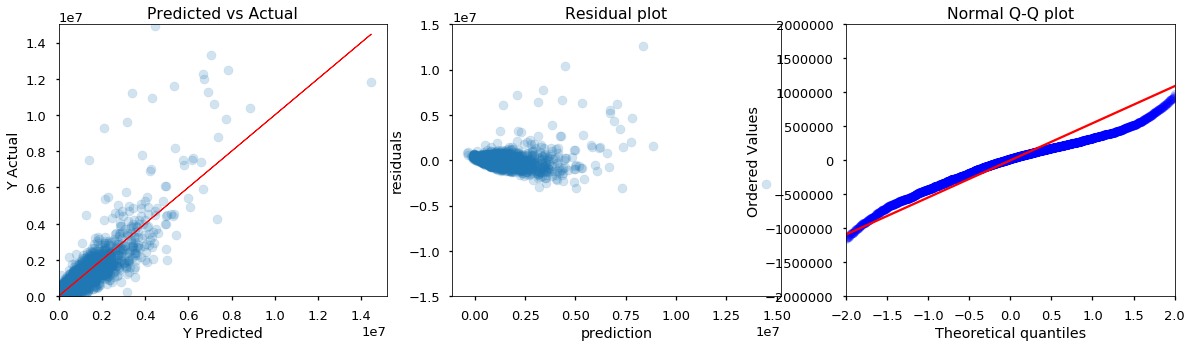

In [591]:
importlib.reload(homepricemodels)

simple_model = homepricemodels.sm_ols_wrapper(y_train['Sales Price'], X_train[regressables])

In [587]:
(X_test[regressables]).shape
(X_train[regressables]).shape
#X_test[regressables] = sm.add_constant(X_test[regressables])
simple_model.predict(X_test[regressables])

ValueError: shapes (1317,21) and (22,) not aligned: 21 (dim 1) != 22 (dim 0)

                            OLS Regression Results                            
Dep. Variable:            Sales Price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     239.9
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:32:06   Log-Likelihood:                -45638.
No. Observations:                3073   AIC:                         9.133e+04
Df Residuals:                    3046   BIC:                         9.149e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.935e+04   5.47e+04  

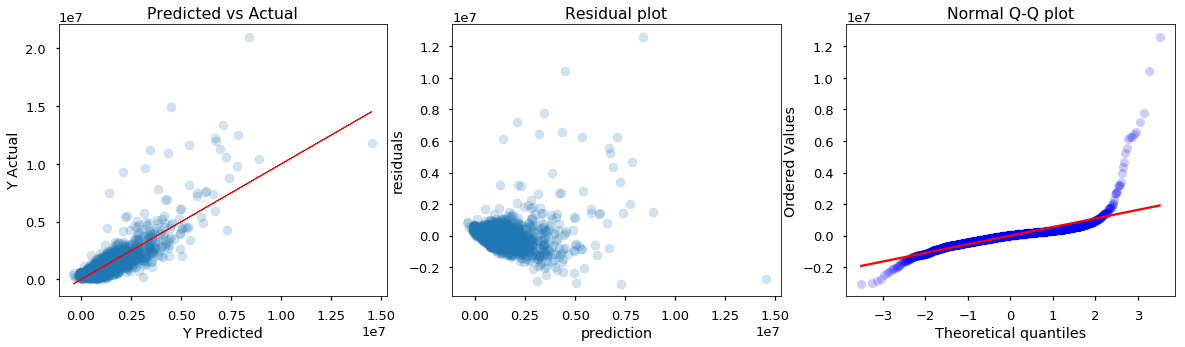

In [414]:
simple_model = sm_ols_wrapper(y_train['Sales Price'], X_train[regressables])

In [ ]:
simple_model = sm_ols_wrapper(y_train['Sales Price'], X_train[regressables])

In [351]:

    



def get_gridsearch_lasso(X, y, test_size=0.3, random_state=0, score='r2', kfold=5):
    # Split the dataset into test and train.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)

    # Set the parameters by cross-validation
    tuned_parameters = [{'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
                         'normalize': [True, False]}]


    print("# Tuning hyper-parameters for %s" % 'r2')
    print()

    reg = GridSearchCV(Lasso(), tuned_parameters, cv=kfold,
                       scoring=score)
    reg.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(reg.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = reg.cv_results_['mean_test_score']
    stds = reg.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, reg.cv_results_['params']):
        print("%0.4f (+/-%0.04f) for %r"
              % (mean, std * 2, params))
    print()
    return reg.best_params_

def get_lasso(X_train,y_train, alpha, normalize):
    reg = Lasso(alpha=alpha, normalize=normalize)
    reg.fit(X_train,y_train)
    
    not_null_list = []

    for tup in list(zip(X_train.columns, reg.coef_)):
        print(tup)
        if abs(tup[1])>0.001:
            not_null_list.append(tup)
    return reg, not_null_list

def get_lasso_with_gridsearch(X, y):
    best_params_ = get_gridsearch_lasso(X, y, test_size=0.3, random_state=0, score='r2', kfold=5)
    print(best_params_)
    return get_lasso(X, y, best_params_['alpha'], best_params_['normalize'])
    

In [575]:

def lasso_loop(X,y):
    
    diff_not_null_list = 1

    while diff_not_null_list>0:
        
        print('The design matrix has {} features.'.format(len(X.columns)))
        
        reg, not_null_list = get_lasso_with_gridsearch(X, y)

        features = []
        for feature in not_null_list:
            features.append(feature[0])

        
        diff_not_null_list = len(X.columns) - len(features)
        
        X = X[features]
    
    return reg, not_null_list, features
    


    
    

In [370]:
reg, not_null_list, features = lasso_loop(X_train.select_dtypes(include=['float64','uint8']), y_train['Sqrt Sales Price'])

The design matrix has 630 features.
# Tuning hyper-parameters for r2



/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objectiv

/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objectiv

Best parameters set found on development set:

{'alpha': 0.1, 'normalize': True}

Grid scores on development set:

0.7904 (+/-0.1426) for {'alpha': 0.0001, 'normalize': True}
0.7901 (+/-0.1434) for {'alpha': 0.0001, 'normalize': False}
0.7931 (+/-0.1378) for {'alpha': 0.001, 'normalize': True}
0.7899 (+/-0.1428) for {'alpha': 0.001, 'normalize': False}
0.8141 (+/-0.1023) for {'alpha': 0.01, 'normalize': True}
0.7901 (+/-0.1403) for {'alpha': 0.01, 'normalize': False}
0.8273 (+/-0.0604) for {'alpha': 0.1, 'normalize': True}
0.7919 (+/-0.1356) for {'alpha': 0.1, 'normalize': False}
0.6645 (+/-0.1191) for {'alpha': 1, 'normalize': True}
0.7864 (+/-0.1688) for {'alpha': 1, 'normalize': False}
-0.0013 (+/-0.0027) for {'alpha': 10, 'normalize': True}
0.7856 (+/-0.1703) for {'alpha': 10, 'normalize': False}
-0.0013 (+/-0.0027) for {'alpha': 100, 'normalize': True}
0.7870 (+/-0.1691) for {'alpha': 100, 'normalize': False}

{'alpha': 0.1, 'normalize': True}
('Baths', 0.0)
('Beds', -0.0)
('Total

/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objectiv

/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objectiv

Best parameters set found on development set:

{'alpha': 0.01, 'normalize': True}

Grid scores on development set:

0.8286 (+/-0.0674) for {'alpha': 0.0001, 'normalize': True}
0.8285 (+/-0.0674) for {'alpha': 0.0001, 'normalize': False}
0.8291 (+/-0.0672) for {'alpha': 0.001, 'normalize': True}
0.8286 (+/-0.0674) for {'alpha': 0.001, 'normalize': False}
0.8305 (+/-0.0650) for {'alpha': 0.01, 'normalize': True}
0.8289 (+/-0.0675) for {'alpha': 0.01, 'normalize': False}
0.8287 (+/-0.0590) for {'alpha': 0.1, 'normalize': True}
0.8288 (+/-0.0687) for {'alpha': 0.1, 'normalize': False}
0.6655 (+/-0.1161) for {'alpha': 1, 'normalize': True}
0.8248 (+/-0.0753) for {'alpha': 1, 'normalize': False}
-0.0013 (+/-0.0027) for {'alpha': 10, 'normalize': True}
0.8108 (+/-0.0792) for {'alpha': 10, 'normalize': False}
-0.0013 (+/-0.0027) for {'alpha': 100, 'normalize': True}
0.7983 (+/-0.0793) for {'alpha': 100, 'normalize': False}

{'alpha': 0.01, 'normalize': True}
('Total Sq. Ft.', 0.121326874036209

/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objectiv

Best parameters set found on development set:

{'alpha': 0.01, 'normalize': True}

Grid scores on development set:

0.8282 (+/-0.0680) for {'alpha': 0.0001, 'normalize': True}
0.8281 (+/-0.0680) for {'alpha': 0.0001, 'normalize': False}
0.8288 (+/-0.0676) for {'alpha': 0.001, 'normalize': True}
0.8282 (+/-0.0680) for {'alpha': 0.001, 'normalize': False}
0.8305 (+/-0.0650) for {'alpha': 0.01, 'normalize': True}
0.8286 (+/-0.0679) for {'alpha': 0.01, 'normalize': False}
0.8287 (+/-0.0590) for {'alpha': 0.1, 'normalize': True}
0.8289 (+/-0.0686) for {'alpha': 0.1, 'normalize': False}
0.6655 (+/-0.1162) for {'alpha': 1, 'normalize': True}
0.8247 (+/-0.0754) for {'alpha': 1, 'normalize': False}
-0.0013 (+/-0.0027) for {'alpha': 10, 'normalize': True}
0.8110 (+/-0.0789) for {'alpha': 10, 'normalize': False}
-0.0013 (+/-0.0027) for {'alpha': 100, 'normalize': True}
0.7982 (+/-0.0789) for {'alpha': 100, 'normalize': False}

{'alpha': 0.01, 'normalize': True}
('Total Sq. Ft.', 0.121327366429919

In [371]:
len(not_null_list)

64

In [552]:
features

['Total Sq. Ft.',
 'Year Built',
 '90221',
 '90232',
 '94601',
 '94603',
 '94606',
 '94618',
 '94619*Total Sq. Ft.',
 '94619*Lot Size Sq. Ft.',
 '94619*Single Family Residential',
 '94618*Beds',
 '94618*Oakland',
 '94611*Baths',
 '94611*Total Sq. Ft.',
 '94610*Baths',
 '94610*Total Sq. Ft.',
 '94610*Lot Size Sq. Ft.',
 '94609*Baths',
 '94609*Year Renovated',
 '94607*Total Sq. Ft.',
 '94606*Beds',
 '94606*Oakland',
 '94605*Single Family Residential',
 '94603*Lot Size Sq. Ft.',
 '94603*Single Family Residential',
 '94601*Baths',
 '94601*Total Sq. Ft.',
 '94601*Oakland',
 '90403*Year Built',
 '90403*Lot Size Sq. Ft.',
 '90403*Single Family Residential',
 '90301*Total Sq. Ft.',
 '90301*Year Built',
 '90301*Year Renovated',
 '90301*Single Family Residential',
 '90292*Beds',
 '90292*Single Family Residential',
 '90232*Lot Size Sq. Ft.',
 '90232*Single Family Residential',
 '90232*Los Angeles',
 '90221*Total Sq. Ft.',
 '90221*Single Family Residential',
 '90069*Beds',
 '90069*Total Sq. Ft.',


In [579]:
X_test
vif = homepricemodels.get_vif(X_test[features])

/Users/timcodes/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [580]:
vif

,VIF,Features
0,123.8399,Total Sq. Ft.
1,27.6819,Year Built
2,51.1093,90221
3,inf,90232
4,inf,94601
5,51.7825,94603
6,inf,94606
7,inf,94618
8,6.8950,94619*Total Sq. Ft.
9,2.4423,94619*Lot Size Sq. Ft.


In [373]:
reg.score(X_test[features], y_test['Sqrt Sales Price'])

0.8575842901336939

In [386]:
y_predicted = reg.predict(X_test[features])
#y_sample = reg.predict(X_sample[features])

In [638]:
for col in X_test[features].columns:
    if col not in X_sample.columns:
        X_sample[col]=0

y_sample = reg.predict(X_sample[features])

In [640]:
y_sample**2

array([ 793459.58236645,  837277.99055436,  882274.02512984,
       1215749.82648727, 1269849.36900471, 1325126.53790973])

In [632]:
X_sample.columns.shape

(35,)

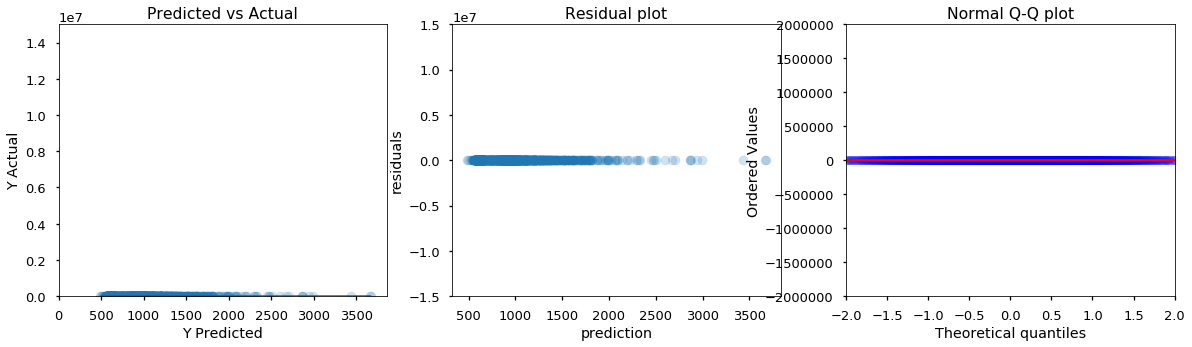

In [593]:
homepricemodels.diagnostic_plot(y_predicted, y_test['Sqrt Sales Price'])


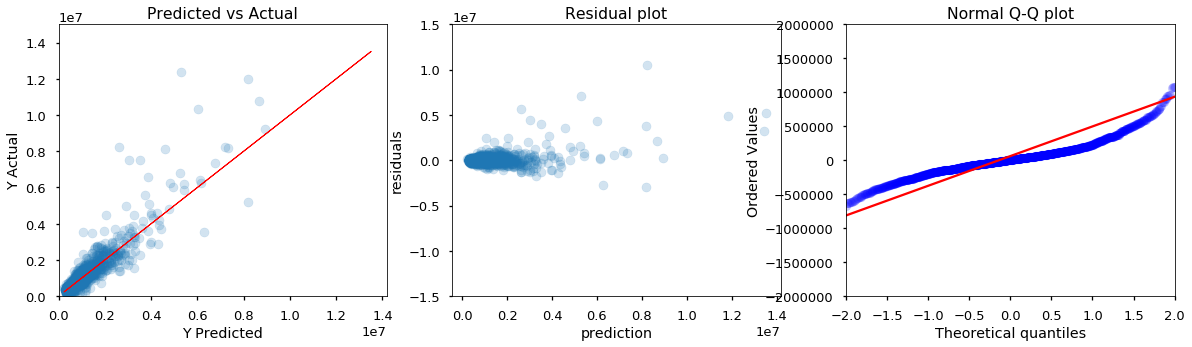

In [592]:
homepricemodels.diagnostic_plot(y_predicted**2, y_test['Sales Price'])



In [421]:
np.sqrt(mean_squared_error(y_test['Sales Price'], y_predicted**2))

624714.6496748746

In [395]:
y_test['Sales Price'].mean()

1201536.8109339408

In [399]:
(y_predicted**2).mean()

1139221.5952319745

In [422]:
r2_score(y_test['Sales Price'], y_predicted**2)

0.8227729149494855

In [411]:
(y_predicted).shape

(1317,)

In [426]:
for feat in features:
    print(feat)

Total Sq. Ft.
Year Built
90221
90232
94601
94603
94606
94618
94619*Total Sq. Ft.
94619*Lot Size Sq. Ft.
94619*Single Family Residential
94618*Beds
94618*Oakland
94611*Baths
94611*Total Sq. Ft.
94610*Baths
94610*Total Sq. Ft.
94610*Lot Size Sq. Ft.
94609*Baths
94609*Year Renovated
94607*Total Sq. Ft.
94606*Beds
94606*Oakland
94605*Single Family Residential
94603*Lot Size Sq. Ft.
94603*Single Family Residential
94601*Baths
94601*Total Sq. Ft.
94601*Oakland
90403*Year Built
90403*Lot Size Sq. Ft.
90403*Single Family Residential
90301*Total Sq. Ft.
90301*Year Built
90301*Year Renovated
90301*Single Family Residential
90292*Beds
90292*Single Family Residential
90232*Lot Size Sq. Ft.
90232*Single Family Residential
90232*Los Angeles
90221*Total Sq. Ft.
90221*Single Family Residential
90069*Beds
90069*Total Sq. Ft.
90069*Lot Size Sq. Ft.
90069*Single Family Residential
90056*Total Sq. Ft.
90049*Beds
90049*Total Sq. Ft.
90049*Single Family Residential
90041*Baths
90041*Total Sq. Ft.
90039*Tota

## Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [241]:
y = df['Sales Price']
#X = pd.Series(1, index=df.index)

/Users/timcodes/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


                            OLS Regression Results                            
Dep. Variable:            Sales Price   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Thu, 26 Apr 2018   Prob (F-statistic):                nan
Time:                        11:50:16   Log-Likelihood:                -67984.
No. Observations:                4390   AIC:                         1.360e+05
Df Residuals:                    4389   BIC:                         1.360e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.141e+06   1.94e+04     58.779      0.0

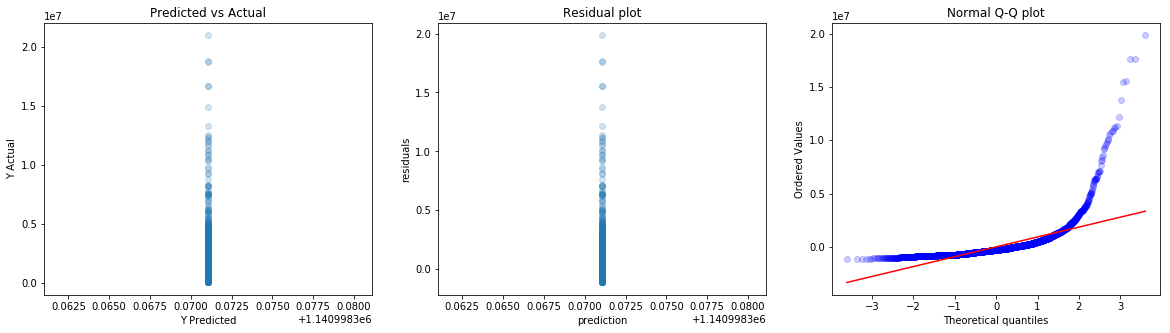

In [244]:
results = sm_ols_wrapper(y)


## Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

                            OLS Regression Results                            
Dep. Variable:            Sales Price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     5285.
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        11:50:21   Log-Likelihood:                -66248.
No. Observations:                4390   AIC:                         1.325e+05
Df Residuals:                    4388   BIC:                         1.325e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.156e+05   2.63e+04    -19.625

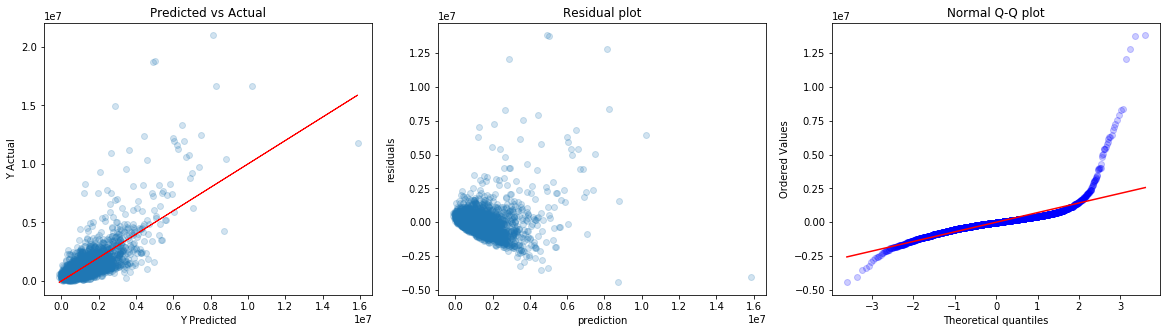

In [245]:
y = df['Sales Price']
X = df['Total Sq. Ft.']

results = sm_ols_wrapper(y, X)


## Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?



(4390,)
(4390, 4)
                            OLS Regression Results                            
Dep. Variable:            Sales Price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     1761.
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        11:50:36   Log-Likelihood:                -66248.
No. Observations:                4390   AIC:                         1.325e+05
Df Residuals:                    4386   BIC:                         1.325e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
cons

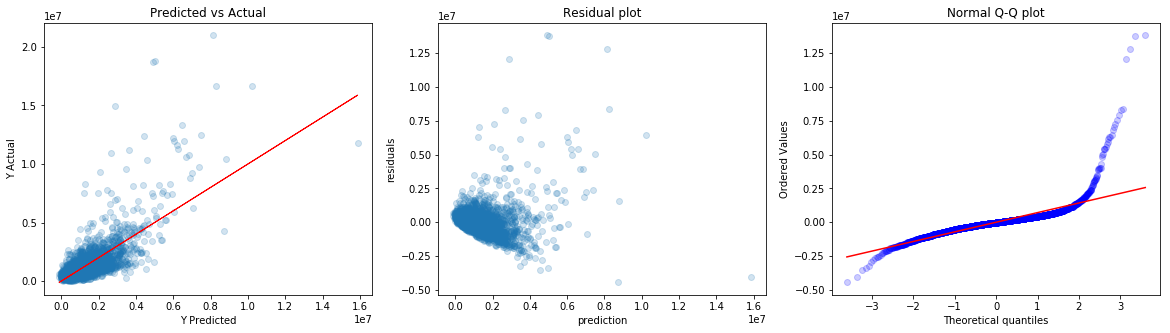

In [246]:
y = df['Sales Price']
X = df[['Total Sq. Ft.']+list(df['Style'].unique())]
print(y.shape)
print(X.shape)
results = sm_ols_wrapper(y, X)



(4390,)
(4390, 25)
                            OLS Regression Results                            
Dep. Variable:            Sales Price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     392.7
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        11:50:41   Log-Likelihood:                -65459.
No. Observations:                4390   AIC:                         1.310e+05
Df Residuals:                    4365   BIC:                         1.311e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.607e+04   

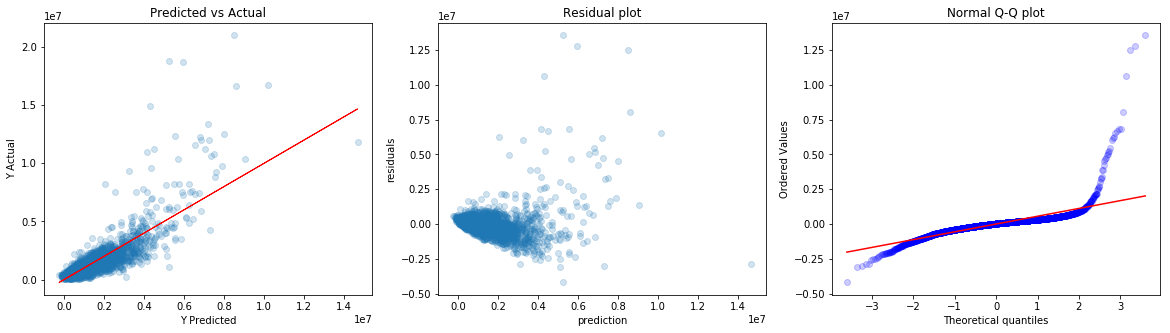

In [247]:
y = df['Sales Price']
X = df[['Total Sq. Ft.']+list(df['Zip Code'].unique())]
print(y.shape)
print(X.shape)
results = sm_ols_wrapper(y, X)

(4390,)
(4390, 3)
                            OLS Regression Results                            
Dep. Variable:            Sales Price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     2858.
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        11:50:44   Log-Likelihood:                -66152.
No. Observations:                4390   AIC:                         1.323e+05
Df Residuals:                    4387   BIC:                         1.323e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.153e+05   1

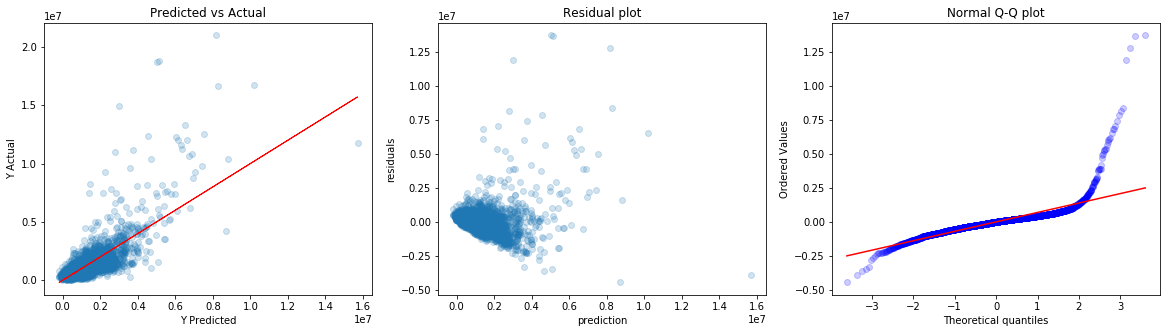

In [248]:
y = df['Sales Price']
X = df[['Total Sq. Ft.']+list(df['City'].unique())]
print(y.shape)
print(X.shape)
results = sm_ols_wrapper(y, X)

## Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.



                            OLS Regression Results                            
Dep. Variable:        Log Sales Price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     1368.
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        11:50:53   Log-Likelihood:                 256.52
No. Observations:                4390   AIC:                            -505.0
Df Residuals:                    4386   BIC:                            -479.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.5229      0.007  

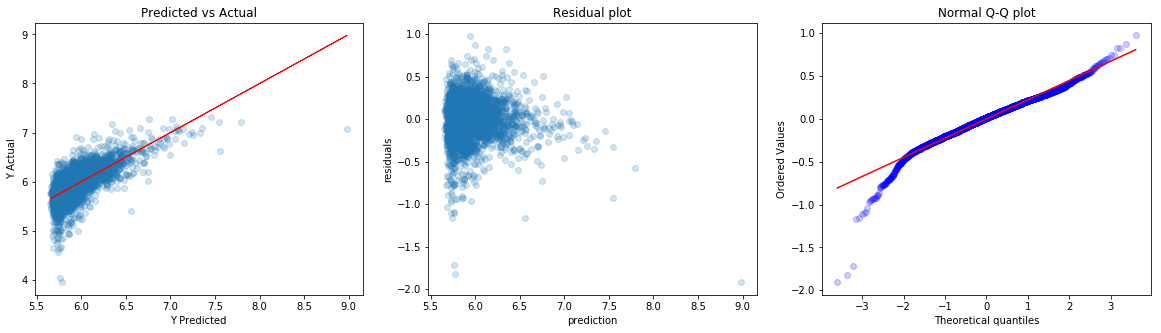

In [249]:
y = df['Log Sales Price']
X = df[['Total Sq. Ft.', 'Baths','Lot Size Sq. Ft.']]

results = sm_ols_wrapper(y, X)

                            OLS Regression Results                            
Dep. Variable:            Sales Price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     1785.
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        11:50:56   Log-Likelihood:                -66232.
No. Observations:                4390   AIC:                         1.325e+05
Df Residuals:                    4386   BIC:                         1.325e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.951e+05   3.36e+04    -14.719

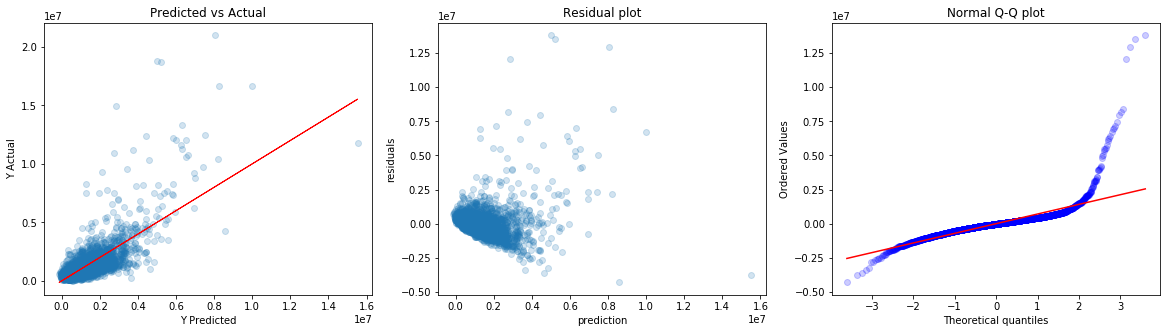

In [250]:
y = df['Sales Price']
X = df[['Total Sq. Ft.','Weeks ago','Baths']]


# X = df[['Total Sq. Ft.', 'Baths','Lot Size Sq. Ft.']]

results = sm_ols_wrapper(y, X)

In [16]:

df.columns
    

Index(['Baths', 'Beds', 'County', 'Last Sold', 'Sales Price', 'Style',
       'Total Sq. Ft.', 'Year Built', 'Year Renovated', 'Zip Code', 'rURL',
       'Lot Size Sq. Ft.', 'Weeks ago', 'City', 'Month Sold', 'Year Sold',
       'Log Sales Price', 'Condo/Co-op', 'Single Family Residential',
       'Townhouse', 'Los Angeles', 'Oakland', '90024', '90026', '90027',
       '90039', '90041', '90049', '90056', '90069', '90221', '90232', '90292',
       '90301', '90403', '94601', '94602', '94603', '94605', '94606', '94607',
       '94609', '94610', '94611', '94618', '94619'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:       Sqrt Sales Price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     2134.
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        11:51:00   Log-Likelihood:                -30631.
No. Observations:                4390   AIC:                         6.127e+04
Df Residuals:                    4386   BIC:                         6.129e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           433.4307     10.113     42.858

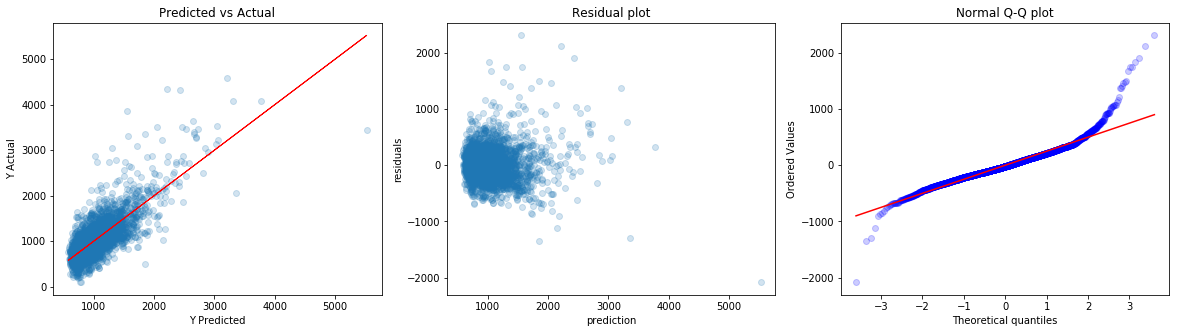

In [251]:
y = df['Sqrt Sales Price']
X = df[['Total Sq. Ft.','Weeks ago','Baths']]

results = sm_ols_wrapper(y, X)

                            OLS Regression Results                            
Dep. Variable:       Sqrt Sales Price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     1602.
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        11:51:02   Log-Likelihood:                -30629.
No. Observations:                4390   AIC:                         6.127e+04
Df Residuals:                    4385   BIC:                         6.130e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              433.2229     10.110  

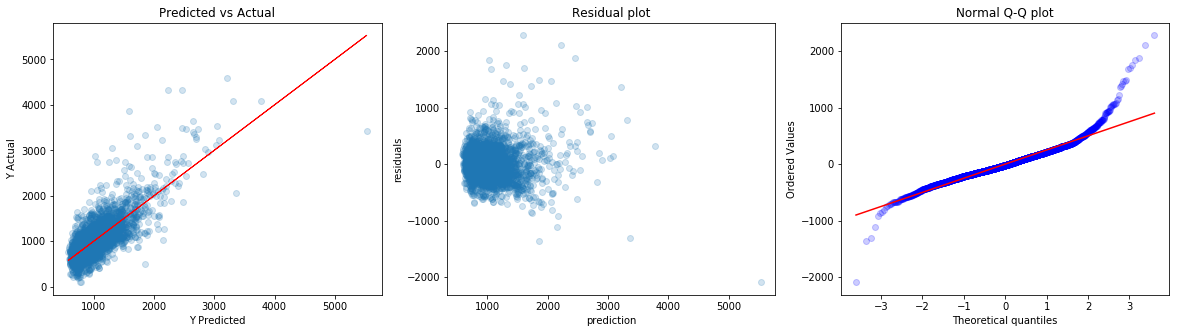

In [252]:
y = df['Sqrt Sales Price']
X = df[['Total Sq. Ft.', 'Weeks ago','Baths', 'Lot Size Sq. Ft.']]

results = sm_ols_wrapper(y, X)

In [253]:
results.pvalues

const              0.0000
Total Sq. Ft.      0.0000
Weeks ago          0.0080
Baths              0.0000
Lot Size Sq. Ft.   0.0504
dtype: float64

In [ ]:
results

                            OLS Regression Results                            
Dep. Variable:       Sqrt Sales Price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     551.4
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        11:51:09   Log-Likelihood:                -25791.
No. Observations:                4124   AIC:                         5.164e+04
Df Residuals:                    4096   BIC:                         5.181e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2023.6083    168.543     12.

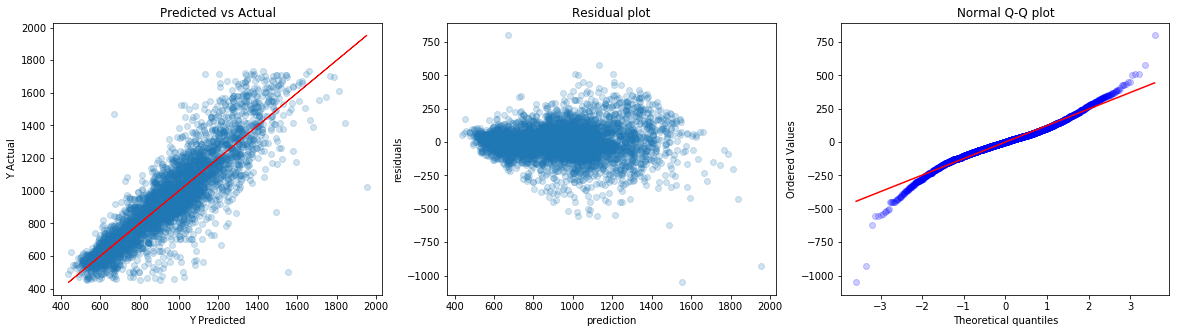

In [254]:
mask = (df['Sales Price']<3000000)&(df['Sales Price']>200000)


y = df[mask]['Sqrt Sales Price']

drop_strings = ['City','Zip Code','County','Style','Last Sold','rURL','Los Angeles','Oakland']
exclude_ys = ['Log Sales Price', 'Sqrt Sales Price', 'Sales Price']
exclude_bads = ['Beds','Baths','Month Sold','Year Sold','Condo/Co-op',
                'Townhouse','Single Family Residential',
                'Lot Size Sq. Ft.'
               ]


X = df.drop(drop_strings+exclude_ys+exclude_bads , axis=1)[mask]

results = sm_ols_wrapper(y, X)

In [255]:
reg = Lasso(alpha= 0.0001, normalize=True)
reg.fit(X_train,y_train)

for tup in list(zip(X_train.columns, reg.coef_)):
    print(tup)


('Baths', 23451.87537562016)
('Beds', -15304.509220791866)
('Total Sq. Ft.', 349.76635428933554)
('Year Built', -1366.7793845299716)
('Year Renovated', 689.2153612380218)
('Lot Size Sq. Ft.', -0.12733632406421241)
('Weeks ago', -1041.6548313493786)
('Month Sold', 9954.077526871075)
('Year Sold', 123058.62463639557)
('Condo/Co-op', 266546.8768489686)
('Single Family Residential', 437500.51192624896)
('Townhouse', -4107.064851623735)
('90024', 704680.0708201617)
('90026', 73901.55886434598)
('90027', 365208.768132531)
('90039', 185180.7249986832)
('90041', -49856.943957925)
('90049', 912004.8481889956)
('90056', -200833.83573433373)
('90069', 882168.9483249882)
('90221', -432965.31356064643)
('90232', 365134.0308442259)
('90292', 512868.36929235014)
('90301', -261067.51428074433)
('90403', 1072853.1048142663)
('94601', -321390.3379508303)
('94602', -40360.21117290241)
('94603', -400204.19203847984)
('94605', -285353.3203945087)
('94606', -249855.09794615506)
('94607', -268074.35727101256

/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


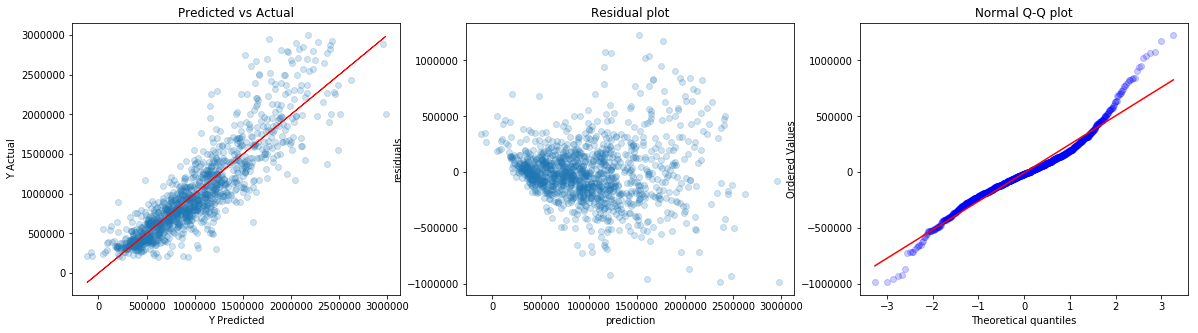

In [256]:
y_pred = reg.predict(X_test)

diagnostic_plot(y_pred, y_test)

In [55]:
mape = (abs((y_test-y_pred)/y_test)).mean()

In [97]:
mape

0.12040393016872866

In [43]:
import numpy as np
np.logspace(-5,-3,5)

array([1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
       1.00000000e-03])

In [103]:
y = df[mask]['Sales Price']

drop_strings = ['City','Zip Code','County','Style','Last Sold','rURL','Los Angeles','Oakland']
exclude_ys = ['Log Sales Price', 'Sqrt Sales Price', 'Sales Price']


X = df.drop(drop_strings+exclude_ys, axis=1)[mask]


# Split the dataset into test and train.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
                     'normalize': [True, False]}]


print("# Tuning hyper-parameters for %s" % 'r2')
print()

reg = GridSearchCV(Lasso(), tuned_parameters, cv=5,
                   scoring='r2')
reg.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(reg.best_params_)
print()
print("Grid scores on development set:")
print()
means = reg.cv_results_['mean_test_score']
stds = reg.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, reg.cv_results_['params']):
    print("%0.4f (+/-%0.04f) for %r"
          % (mean, std * 2, params))
print()



# Tuning hyper-parameters for r2



/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objectiv

Best parameters set found on development set:

{'alpha': 1, 'normalize': True}

Grid scores on development set:

0.7595 (+/-0.0391) for {'alpha': 1, 'normalize': True}
0.7594 (+/-0.0389) for {'alpha': 1, 'normalize': False}
0.7594 (+/-0.0392) for {'alpha': 10, 'normalize': True}
0.7594 (+/-0.0390) for {'alpha': 10, 'normalize': False}
0.7591 (+/-0.0392) for {'alpha': 30, 'normalize': True}
0.7595 (+/-0.0391) for {'alpha': 30, 'normalize': False}
0.7569 (+/-0.0391) for {'alpha': 100, 'normalize': True}
0.7594 (+/-0.0396) for {'alpha': 100, 'normalize': False}



In [67]:
reg = Lasso(alpha= 10, normalize=True)
reg.fit(X_train,y_train)

for tup in list(zip(X_train.columns, reg.coef_)):
    print(tup)

('Baths', 20740.323823270974)
('Beds', -22130.73617392806)
('Total Sq. Ft.', 412.4273634614838)
('Year Built', -2223.446867045591)
('Year Renovated', 1287.6960703252757)
('Lot Size Sq. Ft.', -0.3113366612958773)
('Weeks ago', 1210.0121214680148)
('Month Sold', 426.97194971841753)
('Year Sold', 0.0)
('Condo/Co-op', 80048.32168270592)
('Single Family Residential', 234942.15711440993)
('Townhouse', -215612.2177620056)
('90024', 972850.3141374274)
('90026', 14732.66773820315)
('90027', 252172.17158906165)
('90039', 90322.62570297746)
('90041', -104583.45757614459)
('90049', 991297.19545782)
('90056', -305911.6128435672)
('90069', 968189.3075894666)
('90221', -470424.8953509961)
('90232', 308665.5855134759)
('90292', 506959.1690499391)
('90301', -286900.7152580282)
('90403', 1080643.1507485504)
('94601', -421051.9515761414)
('94602', -133104.27944888046)
('94603', -444779.30189975415)
('94605', -352702.0618845008)
('94606', -331360.3408382615)
('94607', -317166.95493992086)
('94609', 25399.

/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


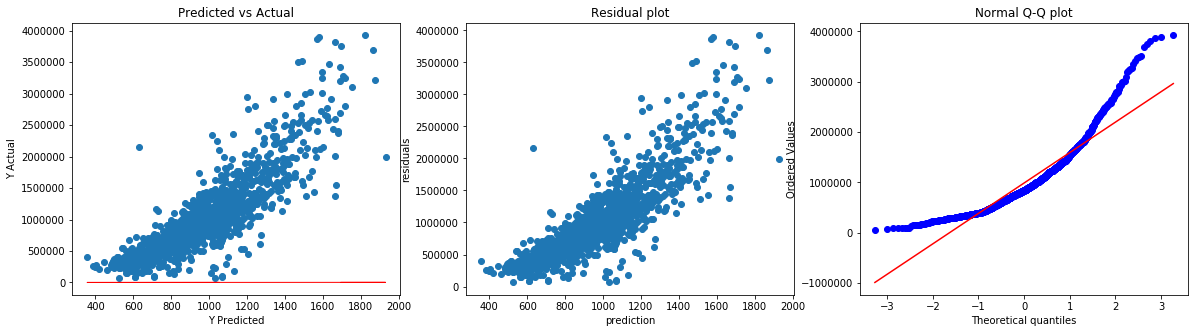

In [68]:
diagnostic_plot(y_pred, y_test)


## Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [184]:
regressables = [#'Baths', 
                #'Beds', 
                'Total Sq. Ft.', 
                #'Year Built', 
                #'Year Renovated', 
                'Lot Size Sq. Ft.', 
                #'Weeks ago', 
                'Month Sold', 
                #'Year Sold', 
                #'Condo/Co-op', 
                #'Single Family Residential', 
                'Townhouse', 
                #'Los Angeles', 
                #'Oakland', 
                '90024', '90026', '90027', '90039', '90041', '90049', '90056', 
                #'90069', 
                '90221', '90232', '90292', '90301', '90403', '94601', '94602', 
                #'94603', 
                '94605', '94606', '94607', '94609', '94610', '94611', '94618', '94619',
               ]
X = df[regressables]
y = df['Sqrt Sales Price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)